# 1. Introduction

In [1]:
'''# Uncomment to push changes to github

!git add .
!git commit -m "Merged Datasets"
!git push -u origin master

'''

'# Uncomment to push changes to github\n\n!git add .\n!git commit -m "Merged Datasets"\n!git push -u origin master\n\n'

### FINDINGS And Questions

1. Total 15 weather stations.
2. Total 1449 unique buildings.
3. 4 types of meters. [0, 1, 2, 3]
4. Why std is so high in square_feet column?
5. We have 117 years of data. Is there potential outlier in years_built column?
6. Do I need to clean the datasets before merging them to train dataset?
7. What is the min/max meter reading, and does it make intuitive sense?
8. primary_use column need to converted to numeric column or dummies columns.
9. Site 7,9 etc line plot of meter_reading is not plotting
10. Which building types have similar kind of charactersitics and energy consumption?

## 2. Library Imports

In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import gc
import psutil

## 3. Exploratory Analysis

In [3]:
train_df = pd.read_csv('./../ashrae-energy-prediction/train.csv')
building_df = pd.read_csv('./../ashrae-energy-prediction/building_metadata.csv')
weather_df = pd.read_csv('./../ashrae-energy-prediction/weather_train.csv')

In [4]:
print(train_df.shape)
print(building_df.shape)
print(weather_df.shape)

(20216100, 4)
(1449, 6)
(139773, 9)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int64
meter            int64
timestamp        object
meter_reading    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


### Reducing DataFrame Size for Faster Performace

In [6]:
# Memory Statistics
train_df.memory_usage(deep=True) * 1e-6

Index               0.000128
building_id       161.728800
meter             161.728800
timestamp        1536.423600
meter_reading     161.728800
dtype: float64

In [7]:
# Code to chage datatypes of columns
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df['building_id'] = train_df['building_id'].astype("int32")
train_df['meter_reading'] = train_df['meter_reading'].astype("float32")
train_df['meter'] = train_df['meter'].astype("int16")

weather_df['timestamp'] = pd.to_datetime(weather_df['timestamp'])

In [8]:
# Check Change in size
train_df.memory_usage(deep=True) * 1e-6

Index              0.000128
building_id       80.864400
meter             40.432200
timestamp        161.728800
meter_reading     80.864400
dtype: float64

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int32
meter            int16
timestamp        datetime64[ns]
meter_reading    float32
dtypes: datetime64[ns](1), float32(1), int16(1), int32(1)
memory usage: 347.0 MB


### Merging the datasets using foreign keys

In [10]:
merged_df = train_df.merge(building_df, on='building_id', how='left')

In [11]:
merged_df = merged_df.merge(weather_df, on=['site_id', 'timestamp'], how='left')

In [12]:
merged_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


### a. Analysis of training dataframe

In [13]:
# Display top 5 rows
merged_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [14]:
# Display bottom 5 rows
merged_df.tail()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
20216095,1444,0,2016-12-31 23:00:00,8.750000,15,Entertainment/public assembly,19619,1914.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216096,1445,0,2016-12-31 23:00:00,4.825000,15,Education,4298,NaN,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216097,1446,0,2016-12-31 23:00:00,0.000000,15,Entertainment/public assembly,11265,1997.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216098,1447,0,2016-12-31 23:00:00,159.574997,15,Lodging/residential,29775,2001.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216099,1448,0,2016-12-31 23:00:00,2.850000,15,Office,92271,2001.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [15]:
merged_df.dtypes

building_id                    int32
meter                          int16
timestamp             datetime64[ns]
meter_reading                float32
site_id                        int64
primary_use                   object
square_feet                    int64
year_built                   float64
floor_count                  float64
air_temperature              float64
cloud_coverage               float64
dew_temperature              float64
precip_depth_1_hr            float64
sea_level_pressure           float64
wind_direction               float64
wind_speed                   float64
dtype: object

In [16]:
merged_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
building_id           int32
meter                 int16
timestamp             datetime64[ns]
meter_reading         float32
site_id               int64
primary_use           object
square_feet           int64
year_built            float64
floor_count           float64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtypes: datetime64[ns](1), float32(1), float64(9), int16(1), int32(1), int64(2), object(1)
memory usage: 3.5 GB


In [17]:
# Why std in so high?
merged_df.square_feet.describe()

count    2.021610e+07
mean     1.077830e+05
std      1.171424e+05
min      2.830000e+02
25%      3.252700e+04
50%      7.270900e+04
75%      1.391130e+05
max      8.750000e+05
Name: square_feet, dtype: float64

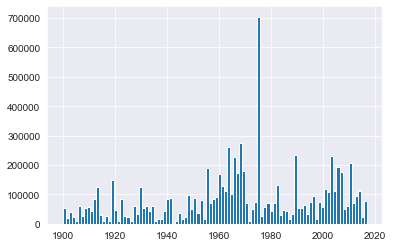

In [18]:
# We have 117 years of data
# Is there potential outlier
merged_df.year_built.hist(bins=100)
plt.show()

In [19]:
merged_df.floor_count.describe()

count    3.506933e+06
mean     4.184848e+00
std      4.008277e+00
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      2.600000e+01
Name: floor_count, dtype: float64

In [20]:
# There are null values in year_built column
merged_df.year_built.isnull().sum()

12127645

In [21]:
# There are lot of null values in floor_count column
merged_df.floor_count.isnull().sum()

16709167

[]

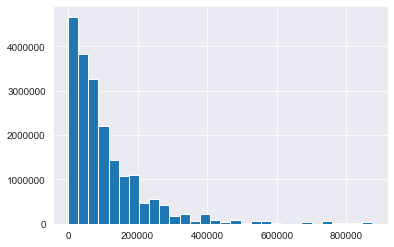

In [22]:
merged_df.square_feet.hist(bins=30)
plt.plot()

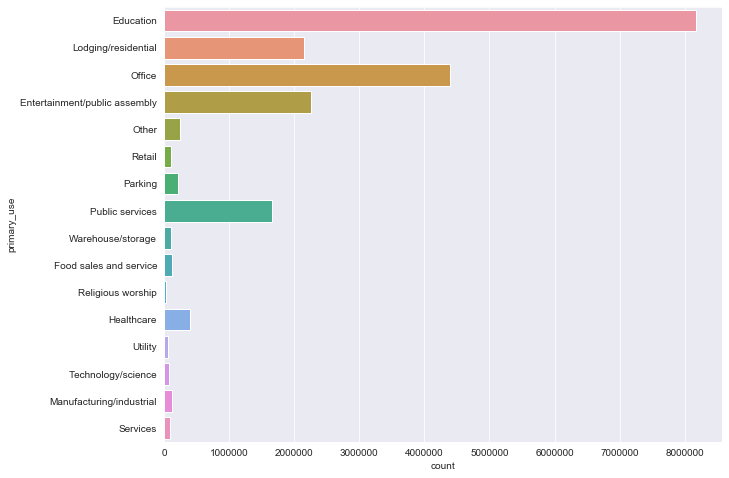

In [23]:
# Do any catrgories need to be combined?
plt.figure(figsize=(10, 8))
sns.countplot(y='primary_use', data=merged_df)
plt.show()

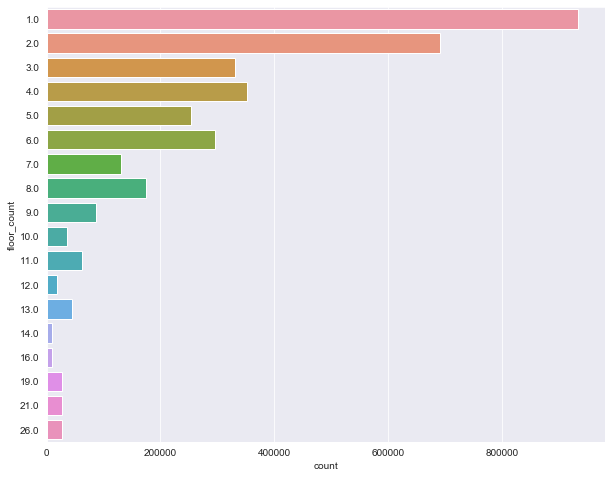

In [24]:
# Will removing floor count affect my model?
plt.figure(figsize=(10, 8))
sns.countplot(y='floor_count', data=merged_df)
plt.show()

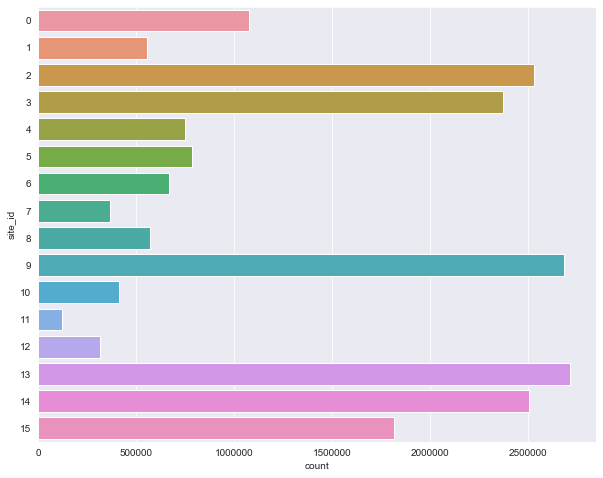

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(y='site_id', data=merged_df)
plt.show()

In [26]:
weather_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [27]:
building_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [28]:
# Thread :- https://www.kaggle.com/c/ashrae-energy-prediction/discussion/112884#latest-658787

temp_df = building_df.merge(weather_df, on='site_id', how='left')

In [29]:
temp_df[temp_df.site_id == 4].head(24)

,site_id,building_id,primary_use,square_feet,year_built,floor_count,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
4960658,4,565,Education,15326,1954.0,2.0,2016-01-01 01:00:00,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
4960659,4,565,Education,15326,1954.0,2.0,2016-01-01 02:00:00,8.3,0.0,-2.8,0.0,1021.6,0.0,0.0
4960660,4,565,Education,15326,1954.0,2.0,2016-01-01 03:00:00,7.8,0.0,-2.8,0.0,1021.7,90.0,1.5
4960661,4,565,Education,15326,1954.0,2.0,2016-01-01 04:00:00,5.0,0.0,-0.6,0.0,1021.8,0.0,0.0
4960662,4,565,Education,15326,1954.0,2.0,2016-01-01 05:00:00,5.6,0.0,-1.1,0.0,1021.6,130.0,3.1
4960663,4,565,Education,15326,1954.0,2.0,2016-01-01 06:00:00,5.0,0.0,-1.1,0.0,1021.6,160.0,1.5
4960664,4,565,Education,15326,1954.0,2.0,2016-01-01 07:00:00,2.8,0.0,-1.7,0.0,1021.1,NaN,1.5
4960665,4,565,Education,15326,1954.0,2.0,2016-01-01 08:00:00,4.4,0.0,-2.2,0.0,1020.9,0.0,0.0
4960666,4,565,Education,15326,1954.0,2.0,2016-01-01 09:00:00,4.4,0.0,-4.4,0.0,1020.5,20.0,2.1
4960667,4,565,Education,15326,1954.0,2.0,2016-01-01 10:00:00,4.4,0.0,-6.7,0.0,1020.8,20.0,2.1


In [30]:
merged_df[merged_df.site_id == 4].head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
722,565,0,2016-01-01,7.250000,4,Education,15326,1954.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
723,566,0,2016-01-01,0.519000,4,Education,2010,1957.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,569,0,2016-01-01,246.000000,4,Education,86091,1964.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,570,0,2016-01-01,79.487999,4,Education,193202,1964.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726,571,0,2016-01-01,17.000000,4,Education,47954,1980.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
merged_df.index = merged_df.timestamp

In [32]:
merged_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,,,,,,,,,
2016-01-01,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


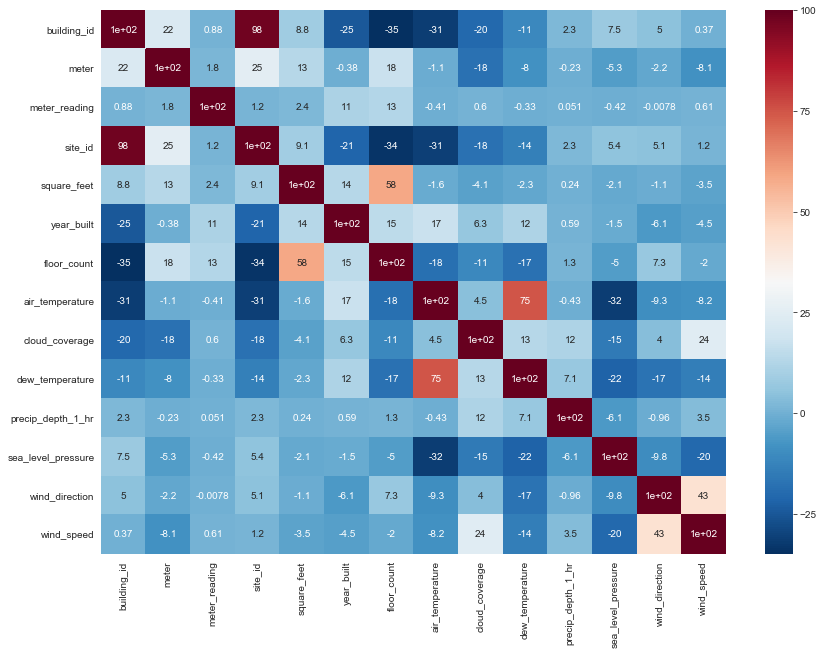

In [33]:
correlation = merged_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation*100, cmap='RdBu_r', annot=True)

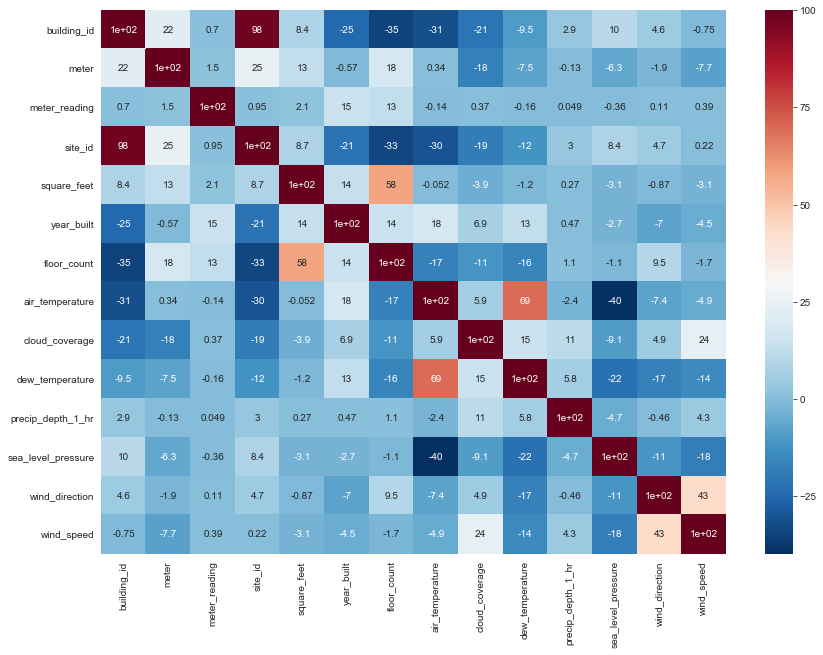

In [34]:
temp_df = merged_df['2016-05-01':]
correlation1 = temp_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation1*100, cmap='RdBu_r', annot=True)

## 4. Data Cleaning

### TODOs
1. 
2. 

In [35]:
merged_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,,,,,,,,,
2016-01-01,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2016-01-01,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [36]:
merged_df.primary_use.unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

In [37]:
merged_df.year_built.unique()

array([2008., 2004., 1991., 2002., 1975., 2000., 1981., 1989., 2003.,
       2010., 1968., 1999., 2013., 1974., 1996., 1980., 1977., 1990.,
       1985., 2001., 1969., 2005., 2016., 2014., 1970., 1971., 2011.,
       1997., 2007., 1998., 2009., 1979., 1986., 2006., 1982., 1983.,
         nan, 1913., 1953., 1909., 1958., 1960., 1976., 1906., 1900.,
       1995., 1956., 1930., 1967., 1919., 1955., 1965., 1907., 2012.,
       1992., 1948., 1950., 1941., 1957., 1964., 1940., 1951., 1966.,
       1934., 1959., 1993., 1939., 1918., 1963., 1987., 1914., 1973.,
       1988., 1935., 1942., 2015., 1931., 1928., 1929., 1908., 1927.,
       1923., 1962., 1944., 1910., 1949., 2017., 1922., 1911., 1932.,
       1978., 1912., 1916., 1924., 1926., 1904., 1984., 1903., 1925.,
       1961., 1921., 1972., 1936., 1954., 1905., 1920., 1917., 1952.,
       1994., 1933., 1945., 1938., 1915., 1947., 1946., 1902., 1937.])

In [38]:
merged_df.floor_count.unique()

array([nan,  5.,  4., 10.,  6.,  8.,  7.,  9., 13., 16., 11., 12.,  2.,
        3.,  1., 14., 21., 26., 19.])

In [39]:
merged_df.groupby('primary_use').mean()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
primary_use,,,,,,,,,,,,,,
Education,746.121543,0.725243,4585.091797,7.250374,119998.782690,1965.134652,5.244270,16.389896,1.751527,7.839122,0.749801,1015.822101,172.126689,3.293366
Entertainment/public assembly,785.745215,0.562833,473.880676,7.567959,106256.004265,1972.320638,2.093724,17.141617,1.905298,8.661881,0.774980,1016.215361,169.010892,3.317165
Food sales and service,833.948567,1.077746,304.908020,9.227662,39635.179683,2012.000000,NaN,17.231262,1.450976,4.748834,0.539749,1014.486924,174.577342,3.193493
Healthcare,1093.571025,0.859126,738.597595,11.641382,138438.671365,1976.620568,1.000000,13.303335,1.472606,5.582175,0.747271,1016.294189,186.147621,3.449965
Lodging/residential,792.114507,0.686112,279.710449,7.911639,100830.731729,1971.736636,6.382590,17.022129,1.525080,8.624589,0.870181,1016.211196,163.342689,3.096081
Manufacturing/industrial,1110.334373,0.591164,285.897003,11.785822,42169.498739,1954.658646,1.666667,10.316037,2.087295,4.927790,1.084794,1016.211945,189.301182,4.163711
Office,927.903717,0.760413,526.504395,9.910898,96837.479905,1968.976549,3.850769,14.353253,1.904571,6.519680,0.826446,1016.010615,176.929349,3.519290
Other,705.195775,0.166137,138.703781,6.678865,29122.550755,1981.266629,1.067732,17.479227,2.500229,10.310253,1.030056,1017.253911,170.831573,3.581307
Parking,601.612879,0.205415,169.386795,6.094108,287217.872594,2000.621274,3.125795,16.741951,2.731570,8.718301,0.900291,1016.246225,174.895730,3.718891


In [40]:
merged_df.groupby('primary_use').median()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
primary_use,,,,,,,,,,,,,,
Education,796,0,106.750000,7,91254,1966.0,4.0,16.7,0.0,8.9,0.0,1015.7,180.0,3.1
Entertainment/public assembly,835,0,46.072800,8,53194,1976.0,1.0,17.8,0.0,9.4,0.0,1016.1,170.0,3.1
Food sales and service,1105,1,97.199997,13,33215,2012.0,NaN,18.3,0.0,4.4,0.0,1014.0,180.0,3.1
Healthcare,1243,1,211.858002,14,115788,1990.0,1.0,13.9,0.0,6.1,0.0,1016.4,200.0,3.1
Lodging/residential,905,0,68.550003,9,64723,1975.0,7.0,18.3,0.0,10.0,0.0,1016.2,160.0,2.6
Manufacturing/industrial,1172,0,93.986000,13,35201,1968.0,2.0,11.0,2.0,6.0,0.0,1016.3,190.0,4.1
Office,1119,0,77.822998,13,65000,1970.0,3.0,15.6,0.0,7.2,0.0,1016.1,180.0,3.1
Other,828,0,13.030000,8,10103,1981.0,1.0,20.0,2.0,12.2,0.0,1017.5,170.0,3.1
Parking,621,0,45.663651,4,306140,2004.0,2.0,18.9,2.0,10.6,0.0,1016.5,170.0,3.6


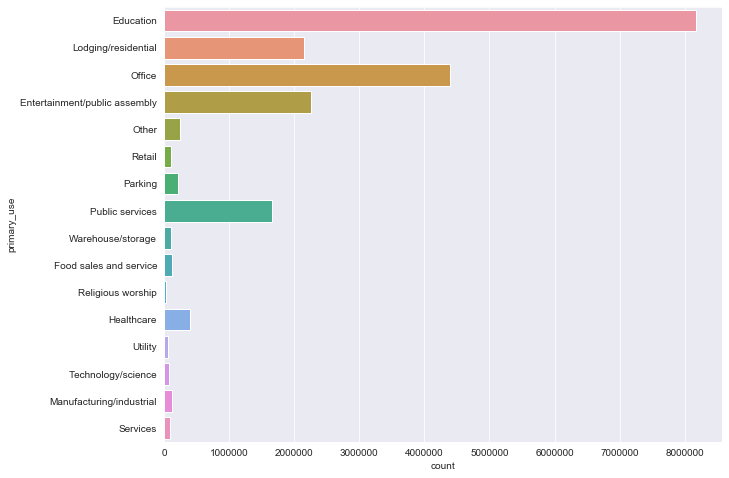

In [41]:
# Can I use previous two table (mean and median) to find the similar building types in terms of enery consumption
plt.figure(figsize=(10, 8))
sns.countplot(y='primary_use', data=merged_df)
plt.show()

In [42]:
merged_df[(merged_df.meter_reading > 1000000)]

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,1099,2,2016-01-01 00:00:00,3241630.0,13,Education,332884,NaN,NaN,-8.3,8.0,-12.2,NaN,1023.3,250.0,4.1
2016-01-01 01:00:00,1099,2,2016-01-01 01:00:00,3241630.0,13,Education,332884,NaN,NaN,-8.3,NaN,-11.7,-1.0,1023.3,240.0,4.1
2016-01-01 05:00:00,1099,2,2016-01-01 05:00:00,1896620.0,13,Education,332884,NaN,NaN,-7.2,NaN,-10.6,0.0,1022.8,270.0,5.1
2016-01-01 09:00:00,1099,2,2016-01-01 09:00:00,3554740.0,13,Education,332884,NaN,NaN,-6.7,NaN,-9.4,-1.0,1022.0,250.0,3.6
2016-01-01 10:00:00,1099,2,2016-01-01 10:00:00,3341210.0,13,Education,332884,NaN,NaN,-8.3,NaN,-11.7,0.0,1021.9,270.0,6.7
2016-01-01 11:00:00,1099,2,2016-01-01 11:00:00,2695780.0,13,Education,332884,NaN,NaN,-8.3,NaN,-11.7,0.0,1021.3,250.0,3.6
2016-01-01 12:00:00,1099,2,2016-01-01 12:00:00,2608420.0,13,Education,332884,NaN,NaN,-8.9,6.0,-12.2,0.0,1020.3,220.0,5.1
2016-01-01 13:00:00,1099,2,2016-01-01 13:00:00,2583650.0,13,Education,332884,NaN,NaN,-9.4,NaN,-11.7,0.0,1019.5,220.0,3.6
2016-01-01 14:00:00,1099,2,2016-01-01 14:00:00,2670430.0,13,Education,332884,NaN,NaN,-8.9,NaN,-11.7,0.0,1019.4,220.0,2.1


In [46]:
# Display Missing values
merged_df.select_dtypes(exclude=['object']).isnull().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64

In [ ]:
# Handling Missing Values


## 5. Feature Engineering

### TODOs
1. 
2. 

## 6. Algorithm Selection

## 7. Model Training

## 8. Insights and Analysis